In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from format_io import h5_to_df

from akita_utils.seq_gens import split_concat_to_integers, split_concat_to_strings

2023-01-03 10:32:01.950542: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2023-01-03 10:32:01.950571: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def average_over_targets(dataframe, stat, mouse=True, model=1):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe

In [5]:
path = "./100VS100strong/scd.h5"
scd_stats=["SCD"]

In [6]:
df = h5_to_df(path, scd_stats, drop_duplicates_key=None)

In [7]:
df = average_over_targets(df, "SCD")

In [9]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average
0,70.68750,77.75000,76.4375,71.31250,76.50000,63.62500,1,"chr9,chr9","15685402,15685402",25,"54.0,54.0",>>,65,"15685383,15685383","+,+",72.75000
1,45.90625,44.40625,47.6250,45.96875,48.59375,44.71875,1,"chr9,chr12","15685402,35192380",25,"54.0,53.78125",>>,65,"15685383,35192361","+,+",46.21875
2,71.62500,78.87500,76.6250,71.62500,77.06250,64.00000,1,"chr9,chr2","15685402,48886271",25,"54.0,53.6875",>>,65,"15685383,48886252","+,-",73.31250
3,80.31250,89.75000,92.1250,86.31250,90.00000,74.18750,1,"chr9,chr12","15685402,35192378",25,"54.0,53.65625",>>,65,"15685383,35192359","+,-",85.43750
4,65.06250,70.62500,67.4375,62.96875,68.75000,57.93750,1,"chr9,chr8","15685402,102781131",25,"54.0,53.5",>>,65,"15685383,102781112","+,-",65.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,85.06250,101.31250,98.1250,92.81250,97.31250,78.81250,3,"chr2,chr2","37815879,17415581",25,"42.1875,42.34375",>>,65,"37815860,17415562","+,-",92.25000
29996,76.50000,90.75000,87.0625,82.18750,87.06250,70.81250,3,"chr2,chr7","37815879,49121503",25,"42.1875,42.3125",>>,65,"37815860,49121484","+,-",82.37500
29997,50.78125,52.09375,59.6250,61.59375,58.68750,51.68750,3,"chr2,chr18","37815879,16211911",25,"42.1875,42.3125",>>,65,"37815860,16211892","+,+",55.75000
29998,89.00000,106.56250,107.1250,101.37500,104.31250,84.31250,3,"chr2,chr8","37815879,26184387",25,"42.1875,42.21875",>>,65,"37815860,26184368","+,+",98.75000


In [10]:
df["core_start"] = df["start"].apply(lambda x: x.split(",")[0])
df["flank_start"] = df["start"].apply(lambda x: x.split(",")[1])

In [11]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average,core_start,flank_start
0,70.68750,77.75000,76.4375,71.31250,76.50000,63.62500,1,"chr9,chr9","15685402,15685402",25,"54.0,54.0",>>,65,"15685383,15685383","+,+",72.75000,15685383,15685383
1,45.90625,44.40625,47.6250,45.96875,48.59375,44.71875,1,"chr9,chr12","15685402,35192380",25,"54.0,53.78125",>>,65,"15685383,35192361","+,+",46.21875,15685383,35192361
2,71.62500,78.87500,76.6250,71.62500,77.06250,64.00000,1,"chr9,chr2","15685402,48886271",25,"54.0,53.6875",>>,65,"15685383,48886252","+,-",73.31250,15685383,48886252
3,80.31250,89.75000,92.1250,86.31250,90.00000,74.18750,1,"chr9,chr12","15685402,35192378",25,"54.0,53.65625",>>,65,"15685383,35192359","+,-",85.43750,15685383,35192359
4,65.06250,70.62500,67.4375,62.96875,68.75000,57.93750,1,"chr9,chr8","15685402,102781131",25,"54.0,53.5",>>,65,"15685383,102781112","+,-",65.50000,15685383,102781112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,85.06250,101.31250,98.1250,92.81250,97.31250,78.81250,3,"chr2,chr2","37815879,17415581",25,"42.1875,42.34375",>>,65,"37815860,17415562","+,-",92.25000,37815860,17415562
29996,76.50000,90.75000,87.0625,82.18750,87.06250,70.81250,3,"chr2,chr7","37815879,49121503",25,"42.1875,42.3125",>>,65,"37815860,49121484","+,-",82.37500,37815860,49121484
29997,50.78125,52.09375,59.6250,61.59375,58.68750,51.68750,3,"chr2,chr18","37815879,16211911",25,"42.1875,42.3125",>>,65,"37815860,16211892","+,+",55.75000,37815860,16211892
29998,89.00000,106.56250,107.1250,101.37500,104.31250,84.31250,3,"chr2,chr8","37815879,26184387",25,"42.1875,42.21875",>>,65,"37815860,26184368","+,+",98.75000,37815860,26184368


In [12]:
df_grouped = df.groupby(["core_start", "flank_start", "flank_bp"]).agg({"SCD_average": "mean"}).reset_index()

In [13]:
df_grouped

,core_start,flank_start,flank_bp,SCD_average
0,100882571,100882571,25,74.68750
1,100882571,101261721,25,77.06250
2,100882571,101905952,25,62.59375
3,100882571,102510621,25,54.15625
4,100882571,102781112,25,64.31250
...,...,...,...,...
9995,9711102,89765679,25,93.31250
9996,9711102,91797706,25,74.93750
9997,9711102,92303369,25,66.93750
9998,9711102,96671788,25,62.28125


In [14]:
all_starts = list(df_grouped.core_start.unique())
all_names = [f"motif {i}" for i in range(len(all_starts))]

In [15]:
dict_of_names = dict(zip(all_starts, all_names))

In [19]:
summary_matrix = np.zeros((len(all_starts), (len(all_starts))))

In [20]:
counter = 0

for core_start in df_grouped.core_start.unique():
    summary_matrix[counter] += df_grouped[df_grouped["core_start"] == core_start]["SCD_average"].values
    counter += 1
    

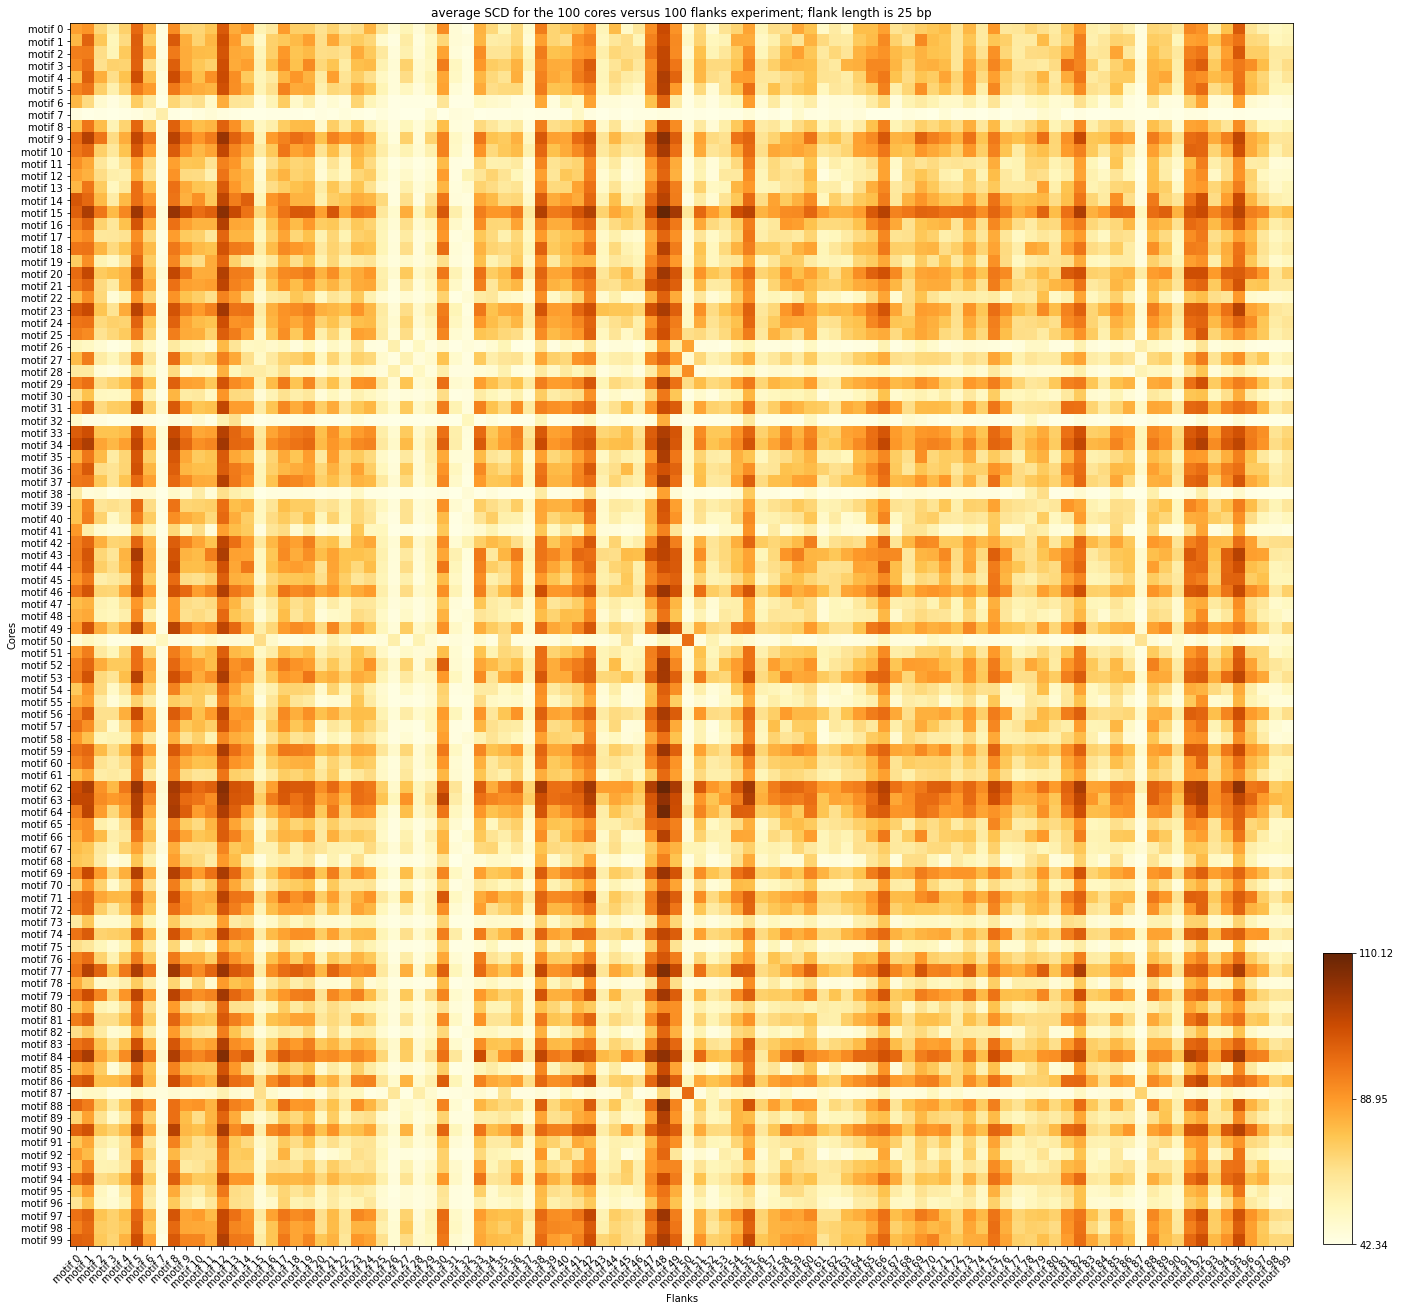

In [62]:
fig, ax = plt.subplots()
im = ax.imshow(summary_matrix, cmap="YlOrBr")

fig.set_figheight(22.5)
fig.set_figwidth(23)

ax.set_xticks(np.arange(len(all_names)), labels=all_names)
ax.set_yticks(np.arange(len(all_names)), labels=all_names)

ax.set_ylabel('Cores')
ax.set_xlabel('Flanks')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("average SCD for the 100 cores versus 100 flanks experiment; flank length is 25 bp")

cax = plt.axes([0.90, 0.126, 0.0175, 0.18])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="YlOrBr"), cax=cax, ticks=[0, 0.5, 1])

cbar.ax.set_yticklabels([str(round(np.min(summary_matrix),2)), 
                         str(round((np.max(summary_matrix) - np.min(summary_matrix)/2),2)), 
                         str(round(np.max(summary_matrix),2))])

# plt.savefig("100vs100_matplot.png")
plt.show()
